In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import random
import seaborn as sns

In [2]:
drivers = ['Hamilton','Verstappen','Leclerc','Sainz','Perez','Russell','Alonso','Norris','Bottas','Gasly']
teams = ['Mercedes','RedBull','Ferrari','McLaren','AstonMartin']
track_types = ['Street','Circuit','Oval']
weather_options = ['Dry','Wet','Mixed']

random.seed(42)
n_samples = 100

data = {
    'Driver': [random.choice(drivers) for _ in range(n_samples)],
    'Team': [random.choice(teams) for _ in range(n_samples)],
    'DriverExperience': [random.randint(1,15) for _ in range(n_samples)],
    'QualifyingPosition': [random.randint(1,20) for _ in range(n_samples)],
    'PitStops': [random.randint(0,3) for _ in range(n_samples)],
    'TrackType': [random.choice(track_types) for _ in range(n_samples)],
    'Weather': [random.choice(weather_options) for _ in range(n_samples)]
}

In [3]:
Top5Finish = []
for i in range(n_samples):
    score = 0
    if data['DriverExperience'][i] > 8: score += 1
    if data['QualifyingPosition'][i] <= 5: score += 2
    if data['PitStops'][i] <= 2: score += 1
    if data['Weather'][i] == 'Dry': score += 1
    Top5Finish.append(1 if score >= 3 else 0)

data['Top5Finish'] = Top5Finish
df = pd.DataFrame(data)
print("Sample Dataset:\n", df.head())

Sample Dataset:
        Driver         Team  DriverExperience  QualifyingPosition  PitStops  \
0  Verstappen      RedBull                 2                  15         0   
1    Hamilton  AstonMartin                12                  10         0   
2       Perez  AstonMartin                11                  14         2   
3       Sainz      Ferrari                 1                  18         1   
4       Sainz  AstonMartin                 4                  16         2   

  TrackType Weather  Top5Finish  
0   Circuit     Dry           0  
1    Street     Dry           1  
2   Circuit     Dry           1  
3      Oval     Dry           0  
4      Oval     Wet           0  


In [4]:
X = df.drop(columns=['Top5Finish','Driver'])
y = df['Top5Finish']

categorical_cols = ['Team','TrackType','Weather']
encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    encoders[col] = le

In [5]:
clf = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=42)
clf.fit(X, y)

DecisionTreeClassifier(max_depth=4, random_state=42)

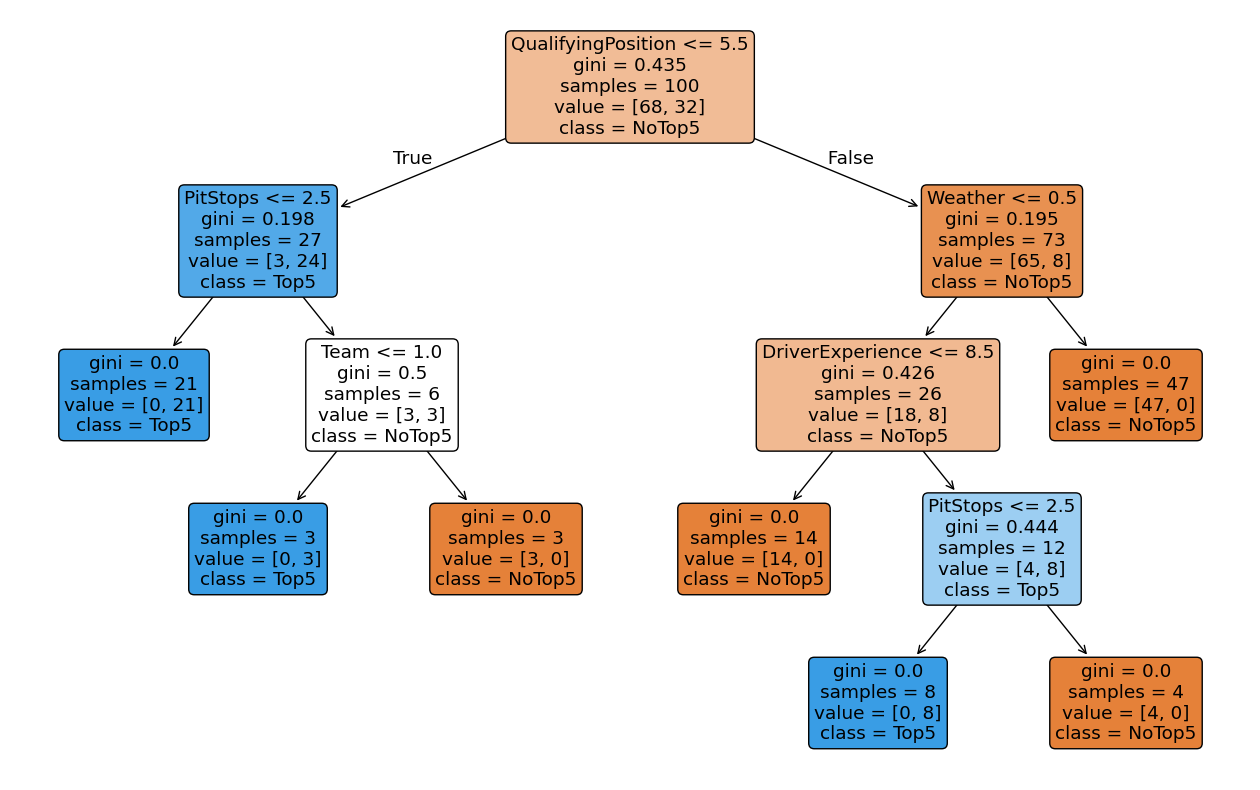

In [6]:
plt.figure(figsize=(16,10))
plot_tree(clf, feature_names=X.columns, class_names=['NoTop5','Top5'], filled=True, rounded=True)
plt.show()

In [7]:
print("\nDecision Tree Rules:\n")
print(export_text(clf, feature_names=list(X.columns)))


Decision Tree Rules:

|--- QualifyingPosition <= 5.50
|   |--- PitStops <= 2.50
|   |   |--- class: 1
|   |--- PitStops >  2.50
|   |   |--- Team <= 1.00
|   |   |   |--- class: 1
|   |   |--- Team >  1.00
|   |   |   |--- class: 0
|--- QualifyingPosition >  5.50
|   |--- Weather <= 0.50
|   |   |--- DriverExperience <= 8.50
|   |   |   |--- class: 0
|   |   |--- DriverExperience >  8.50
|   |   |   |--- PitStops <= 2.50
|   |   |   |   |--- class: 1
|   |   |   |--- PitStops >  2.50
|   |   |   |   |--- class: 0
|   |--- Weather >  0.50
|   |   |--- class: 0



In [8]:
y_pred = clf.predict(X)
acc = accuracy_score(y, y_pred)
cm = confusion_matrix(y, y_pred)
print("\nAccuracy:", acc)
print("Confusion Matrix:\n", cm)


Accuracy: 1.0
Confusion Matrix:
 [[68  0]
 [ 0 32]]


/tmp/ipython-input-1268946417.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=X.columns, palette="viridis")


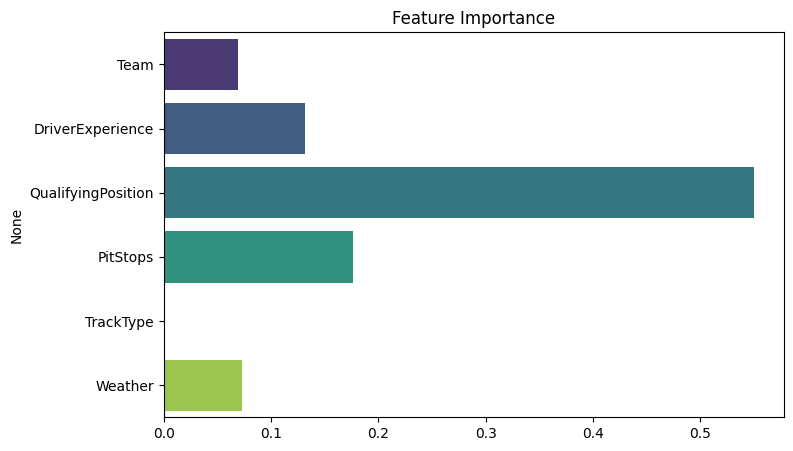

In [22]:
importances = clf.feature_importances_
plt.figure(figsize=(8,5))
sns.barplot(x=importances, y=X.columns, palette="viridis")
plt.title("Feature Importance")
plt.show()

In [23]:
new_race = pd.DataFrame({
    'Driver': ['Hamilton','Verstappen','Leclerc','Sainz','Perez'],
    'Team': ['RedBull','Mercedes','Ferrari','McLaren','AstonMartin'],
    'DriverExperience': [10,5,8,6,7],
    'QualifyingPosition': [2,12,4,8,5],
    'PitStops': [1,2,1,2,0],
    'TrackType': ['Circuit','Street','Circuit','Street','Oval'],
    'Weather': ['Dry','Wet','Dry','Mixed','Dry']
})


In [24]:
for col in categorical_cols:
    new_race[col] = encoders[col].transform(new_race[col])

In [25]:
X_new = new_race.drop(columns=['Driver'])

new_race['Top5Prediction'] = clf.predict(X_new)
new_race['Top5Probability'] = clf.predict_proba(X_new)[:,1]

In [26]:
def color_top5(val):
    return 'background-color: green; color:white; font-weight:bold' if val == 1 else 'background-color: red; color:white; font-weight:bold'

styled_table = new_race[['Driver','Top5Prediction','Top5Probability']].style.applymap(color_top5, subset=['Top5Prediction'])
display(styled_table)


/tmp/ipython-input-729835339.py:4: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_table = new_race[['Driver','Top5Prediction','Top5Probability']].style.applymap(color_top5, subset=['Top5Prediction'])


,Driver,Top5Prediction,Top5Probability
0,Hamilton,1,1.000000
1,Verstappen,0,0.000000
2,Leclerc,1,1.000000
3,Sainz,0,0.000000
4,Perez,1,1.000000
